In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
df = pd.read_csv("netflix_reviews.csv")

## Analysis: Getting an initial grasp of the Dataset.

Let's begin by getting some initial information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113610 entries, 0 to 113609
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113610 non-null  object
 1   userName              113608 non-null  object
 2   content               113608 non-null  object
 3   score                 113610 non-null  int64 
 4   thumbsUpCount         113610 non-null  int64 
 5   reviewCreatedVersion  96972 non-null   object
 6   at                    113610 non-null  object
 7   appVersion            96972 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


---

We can already see that we have 8 columns. And also that we have some missing values.

Here are the **8 columns**:

- reviewId: A unique identifier for each review.
- userName: The name of the user who submitted the review.
- content: The actual text of the review.
- score: The rating given, ranging from 1 to 5.
- thumbsUpCount: The number of "thumbs up" the review received.
- reviewCreatedVersion: __TODO__
- at: The date and time the review was posted.
- appVersion: The version of the app used when the review was written.

Let's have now a preview of the dataset.

In [5]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,cc1cfcd2-dc8a-4ead-88d1-7f2b2dbb2662,NR Bharadwaj,Plsssss stoppppp giving screen limit like when...,2,0,8.120.0 build 10 50712,2024-07-02 17:17:53,8.120.0 build 10 50712
1,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,NaN,2024-06-26 15:38:06,NaN
2,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,NaN,2024-06-24 15:29:54,NaN
3,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
4,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626


In [6]:
# This is useless can be deleted I think.

df.describe()

,score,thumbsUpCount
count,113610.000000,113610.000000
mean,2.812613,10.434724
std,1.700543,101.013411
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


We can see with the command below that there are some missing values in the dataset:

In [9]:
df.isna().sum()

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16638
at                          0
appVersion              16638
dtype: int64

So we have to fill the missing values. We can do that with the following commands:

In [10]:
df.fillna('', inplace=True) 

## Visualization: Inspecting the Data.

Let's begin by visualizing the distribution of the ratings.

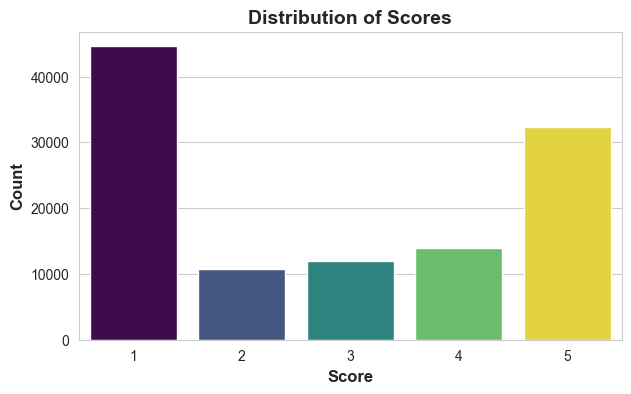

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyzing score distribution
score_counts = df['score'].value_counts().sort_index()

# Create a larger figure size for better visibility
plt.figure(figsize=(7, 4))

# Create a bar plot with a custom color palette, adjusting for deprecation warning
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette='viridis', legend=False)

# Enhancing the label readability
plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Scores', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

We can also check the number of reviews over time.

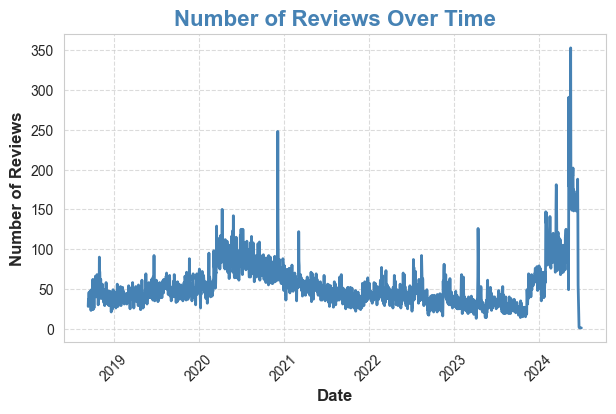

In [14]:
# Convert 'at' column to datetime and extract dates
df['review_date'] = pd.to_datetime(df['at']).dt.date

# Aggregate counts per date and sort
date_counts = df['review_date'].value_counts().sort_index()

# Create a larger figure size for better visibility
plt.figure(figsize=(7, 4))

# Plot data with a better color choice
date_counts.plot(kind='line', color='steelblue', lw=2)  # lw is line width

# Enhancing the label readability
plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold', color='steelblue')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')

# Format the date on the x-axis for better readability
plt.xticks(rotation=45)

# Enable grid and set properties for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Let's also check how long the reviews are.

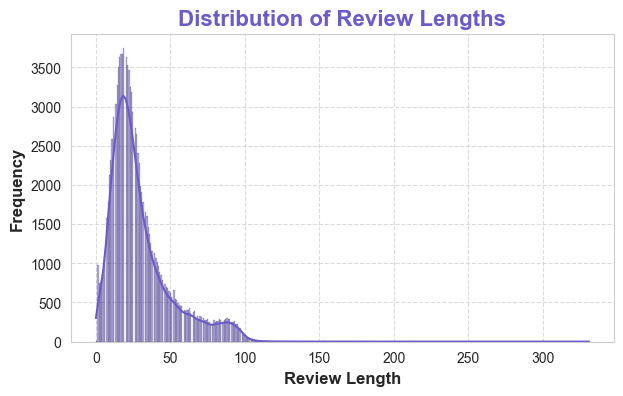

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate review length
df['review_length'] = df['content'].apply(lambda x: len(x.split()))

# Create a figure with improved dimensions
plt.figure(figsize=(7, 4))

# Plot the histogram with a kernel density estimate
# Corrected to ensure the DataFrame is referred as 'data' not 'df'
sns.histplot(data=df, x='review_length', color='slateblue', kde=True, edgecolor='black')

# Enhancing the label readability
plt.title('Distribution of Review Lengths', fontsize=16, fontweight='bold', color='slateblue')
plt.xlabel('Review Length', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Enable grid and set properties for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()